### Through a variety of use-cases, this notebook explores and applies fundamental concepts in Linear Algebra using Julia as a teaching tool. 
It seeks to improve comprehension and abilities in both mathematics and programming.

#### Let's start with Basic Julia Syntax for Linear Algebra

- **Defining Matrices:** Use square brackets and semicolons to define matrices. For example, to define matrix (A):

In [31]:
A = [1 2 4; 3 4 4; 2 2 8]

3×3 Matrix{Int64}:
 1  2  4
 3  4  4
 2  2  8

Notice, how good output visualization in Julia. After defenition, you can observe dimations, type of data in matrix and matrix inself in the output. Very useful feature 

Know how to use Indexing entries. We get the i, j entry of a matrix A using A[i,j]. We can also
assign a new value to an entry.

In [32]:
A[2, 3] # Get 2,3 entry of A

4

In [33]:
A[1, 3] = 7
A

3×3 Matrix{Int64}:
 1  2  7
 3  4  4
 2  2  8

- Lets start with the simplest things we usually use in linear algebra. We will start with importing LinearAlgebra package. If you work with Julia first time, you will need to add this package first. 

In [34]:
# using Pkg
# Pkg.add("LinearAlgebra")
using LinearAlgebra

Now, we can try to find Trace, Determinant and Inverse of the matrix using pretty easy syntaxis:

In [35]:
tr(A)

13

In [36]:
det(A)

-21.999999999999996

In [37]:
inv(A)

3×3 Matrix{Float64}:
 -1.09091     0.0909091   0.909091
  0.727273    0.272727   -0.772727
  0.0909091  -0.0909091   0.0909091

To find size, type or adjoint of A we use: 

In [38]:
typeof(A)

Matrix{Int64} (alias for Array{Int64, 2})

In [39]:
A'

3×3 adjoint(::Matrix{Int64}) with eltype Int64:
 1  3  2
 2  4  2
 7  4  8

We can also add, substract and multiply them. 

In [40]:
A + inv(A)

3×3 Matrix{Float64}:
 -0.0909091  2.09091  7.90909
  3.72727    4.27273  3.22727
  2.09091    1.90909  8.09091

In [41]:
A - inv(A)

3×3 Matrix{Float64}:
 2.09091  1.90909  6.09091
 2.27273  3.72727  4.77273
 1.90909  2.09091  7.90909

In [42]:
A * inv(A)

3×3 Matrix{Float64}:
  1.0          1.11022e-16  -1.11022e-16
 -1.66533e-16  1.0          -4.996e-16
 -1.11022e-16  1.11022e-16   1.0

#### Great, next step is usually Computing Eigenvalues and Eigenvectors

Julia makes computing eigenvalues and eigenvectors straightforward with the `eigen` function. For a matrix (A), the computation is as follows:

In [43]:

A = [4 1; 2 3]
eigvals = eigen(A).values
eigvecs = eigen(A).vectors

println("Eigenvalues: ", eigvals)
println("Eigenvectors: ", eigvecs)

Eigenvalues: [2.0, 5.0]
Eigenvectors: [-0.4472135954999579 0.7071067811865475; 0.8944271909999159 0.7071067811865475]



This code outputs the eigenvalues and eigenvectors of (A), illustrating the basic use of the `eigen` function.

#### Example 1: Eigenvalues and Eigenvectors of a Symmetric Matrix

Symmetric matrices have real eigenvalues and orthogonal eigenvectors. Consider B:

In [44]:
B = [5 2; 2 5]
eigenB = eigen(B)

println("Eigenvalues of B: ", eigenB.values)
println("Eigenvectors of B: ")
println(eigenB.vectors)

Eigenvalues of B: [3.0, 7.0]
Eigenvectors of B: 


[-0.7071067811865475 0.7071067811865475; 0.7071067811865475 0.7071067811865475]


#### Example 2: Diagonalization

Diagonalization is the process of finding a diagonal matrix (D) such that (D = P^{-1}AP), where (A) is the original matrix, and (P) is the matrix of its eigenvectors. This process is significant because it simplifies matrix operations, such as raising the matrix to a power.

Consider the matrix (A). We'll compute (P), (D), and verify (A = PDP^{-1}).

In [45]:
A = [4 1; 2 3]
eigenA = eigen(A)
P = eigenA.vectors
D = Diagonal(eigenA.values)
A_reconstructed = P * D * inv(P)

println("Reconstructed A: ")
println(A_reconstructed)

Reconstructed A: 
[4.0 1.0; 2.0 3.0]


### It's also imporntant to know how to solve A * x = b using special matrices in Julia

### Solving Linear Systems with Special Matrices

Solving a linear system A * x = b where A is a matrix and x and b are vectors, is a common problem in linear algebra. When A possesses certain special properties, Julia can solve these systems more efficiently.

1. **Identify Matrix Type:** First, determine if matrix A has any special properties (e.g., symmetric, diagonal). This can significantly influence the solving strategy.
   
2. **Use Appropriate Julia Type:** If A is special, like symmetric or diagonal, use the corresponding Julia type to inform the solver. This allows Julia to optimize the solving process.

3. **Solve the System:** Use the backslash operator `\` to solve for A in A * x = b.

**Example:**

In [46]:
# Assuming A is symmetric
A = [1 2; 2 3]
b = [4; 5]
A_sym = Symmetric(A)
x = A_sym \ b

2-element Vector{Float64}:
 -2.0000000000000013
  3.0000000000000004

### Singular Value Decomposition (SVD)

SVD is a powerful factorization method used for analyzing and solving complex matrices. It decomposes a matrix A into three components: U, Σ (singular values), and V^T.

**Example:**

In [47]:
A = [1.5 2 -4; 3 -1 -6; -10 2.3 4]
U, S, Vt = svd(A)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
3×3 Matrix{Float64}:
 -0.251575  -0.633207   0.731956
 -0.472766  -0.579512  -0.663821
  0.844513  -0.513044  -0.153568
singular values:
3-element Vector{Float64}:
 12.675631263128025
  5.011261550199074
  1.9379447248845607
Vt factor:
3×3 Matrix{Float64}:
 -0.807912   0.15084   0.569672
  0.487322  -0.372542  0.789766
  0.331355   0.915675  0.227473


The output includes:
- **U factor:** An orthogonal matrix whose columns are the left singular vectors.
- **Singular values:** A vector containing the singular values, indicating the magnitude of each corresponding singular vector.
- **Vt factor:** The transpose of V, an orthogonal matrix whose columns are the right singular vectors.

These components are essential for tasks like dimensionality reduction, noise reduction, and more. It's quite usuful when we are taling about Machine Learning. 

### We also can learn Using ARPACK for Eigenvalue Problems

For large matrices or when you need only a few eigenvalues, using an iterative method like those provided by ARPACK can be more efficient and cheap.

**Example:**

In [48]:
# import Pkg;
# Pkg.add("Arpack");
using Arpack
A = randn(20, 20)
vals, vecs = eigs(A)

(ComplexF64[-4.349070542331225 + 0.0im, 0.8014174219242668 + 4.17449488588239im, 0.8014174219242668 - 4.17449488588239im, 3.920968459021969 + 0.9312436648234582im, 3.920968459021969 - 0.9312436648234582im, -2.367796655532779 + 2.6306940290545313im], ComplexF64[0.3597443989768264 + 0.0im -0.19520971439819218 - 0.13285324762348089im … -0.15519668299225417 - 0.018575055314262495im 0.026051121507134067 - 0.07063203390480255im; 0.18949468215329732 + 0.0im 0.19215504995555865 - 0.19813872307221514im … -0.38875413824236943 + 0.09942485641339548im 0.07375625631064464 - 0.0530300846608331im; … ; -0.011331066052175667 + 0.0im -0.008608217219886305 - 0.22525035246811592im … -0.2723332420768755 + 0.024223099073139184im -0.23763384944400168 - 0.2600468039739794im; 0.4117191106753012 + 0.0im -0.10429674233796629 + 0.0073742941933909595im … -0.3450251274969582 + 0.11887181240583547im -0.10061838497008892 - 0.18094285815770775im], 7, 1, 20, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

This example shows diagonalization and reconstruction of the original matrix, highlighting the practical application of eigenvalues and eigenvectors in simplifying matrix operations.

### One more important feature we need to know is Matrix Factorizations in Julia

### The Essence of Factorizing Matrices

Think of matrix factorization as breaking a complex problem into manageable pieces. It's akin to dividing a large task into smaller, more straightforward tasks that you can tackle easily. Julia excels in identifying the nature of a matrix and selecting the optimal factorization route to streamline computations.



Let's start with our first example, matrix A:

In [49]:
A = [2.5 2 -2; 2 -2 -6; -8 2.8 5]

3×3 Matrix{Float64}:
  2.5   2.0  -2.0
  2.0  -2.0  -6.0
 -8.0   2.8   5.0

This matrix doesn't have any apparent symmetry or pattern, so Julia opts for LU factorization when we call `factorize(A)`. LU factorization decomposes A into two matrices, L (lower triangular) and U (upper triangular), making certain calculations more straightforward.

#### LU Factorization of Matrix A

In [50]:
F = factorize(A)

LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
3×3 Matrix{Float64}:
  1.0      0.0       0.0
 -0.3125   1.0       0.0
 -0.25    -0.452174  1.0
U factor:
3×3 Matrix{Float64}:
 -8.0  2.8     5.0
  0.0  2.875  -0.4375
  0.0  0.0    -4.94783

Julia provides us with L and U matrices. This decomposition is particularly useful for solving linear systems or inverting matrices efficiently.

### Exploring Symmetry with Matrix B

Now, consider matrix B, which has a hidden symmetry:

In [51]:
B = [1.5 2 -4; 2 -1 -3; -4 -3 5]

3×3 Matrix{Float64}:
  1.5   2.0  -4.0
  2.0  -1.0  -3.0
 -4.0  -3.0   5.0

Julia detects B's symmetry and applies a Bunch-Kaufman factorization, an approach better suited for symmetric matrices, enhancing computational efficiency.

#### Bunch-Kaufman Factorization of Symmetric Matrix B

In [52]:
F = factorize(B)

BunchKaufman{Float64, Matrix{Float64}, Vector{Int64}}
D factor:
3×3 Tridiagonal{Float64, Vector{Float64}}:
 -1.64286   0.0   ⋅ 
  0.0      -2.8  0.0
   ⋅        0.0  5.0
U factor:
3×3 UnitUpperTriangular{Float64, Matrix{Float64}}:
 1.0  0.142857  -0.8
  ⋅   1.0       -0.6
  ⋅    ⋅         1.0
permutation:
3-element Vector{Int64}:
 1
 2
 3

This method is a testament to Julia's ability to leverage matrix properties for optimization, showcasing the language's power in mathematical computations.
### Helping Julia with Matrix Tags

We can also directly inform Julia about a matrix's special properties, such as symmetry. This can be done by tagging:

In [53]:
sB = Symmetric(B)

3×3 Symmetric{Float64, Matrix{Float64}}:
  1.5   2.0  -4.0
  2.0  -1.0  -3.0
 -4.0  -3.0   5.0

Tagging helps Julia to choose the most suitable method for operations involving the matrix, further optimizing performance.

### Solving Equations with Tagged Matrices

Tagging shines when solving equations. Let's solve a system involving our symmetric matrix B:

In [54]:
x = [1; 2; 3]
solution = sB \ x

3-element Vector{Float64}:
 -1.7391304347826084
 -1.1086956521739126
 -1.4565217391304346

Here, Julia uses the matrix's symmetry to solve the equation efficiently, showcasing the elegance of Julia's matrix operations.


Julia recognizes various special matrices, each with its optimized computation paths. Understanding these can significantly improve your problem-solving strategy in linear algebra:

- **Symmetric and Hermitian Matrices:** Ideal for operations preserving symmetry.
- **Diagonal and Tridiagonal Matrices:** Simplify computations involving eigenvalues and linear systems.
- **Upper/Lower Triangular Matrices:** Useful in solving linear equations efficiently.

### Some showcases of Sparse Matrices in Julia

#### Why Sparse Matrices?

Imagine you have a giant matrix where most of the entries are zeros. Storing every single element, including all those zeros, would be a waste of space and computational resources. Sparse matrices allow us to focus on the non-zero elements, making our computations faster and more memory-efficient.


We'll begin by importing the necessary libraries:

In [55]:
# import Pkg;
# Pkg.add("SparseArrays");
using SparseArrays


#### Creating a Sparse Matrix

Let's create a sparse matrix with a 20% chance of non-zero elements:


In [56]:
A = sprand(15, 15, 0.2)

15×15 SparseMatrixCSC{Float64, Int64} with 34 stored entries:
  ⋅        0.864714   ⋅         ⋅        …   ⋅         ⋅         ⋅ 
  ⋅        0.615271   ⋅         ⋅            ⋅         ⋅         ⋅ 
  ⋅         ⋅         ⋅         ⋅            ⋅         ⋅         ⋅ 
  ⋅         ⋅         ⋅        0.99473       ⋅         ⋅         ⋅ 
  ⋅        0.168956   ⋅         ⋅            ⋅         ⋅         ⋅ 
  ⋅         ⋅         ⋅         ⋅        …   ⋅         ⋅         ⋅ 
  ⋅         ⋅        0.129264   ⋅            ⋅         ⋅        0.953865
 0.295899   ⋅         ⋅        0.19802      0.956186  0.619594   ⋅ 
  ⋅        0.49504    ⋅         ⋅            ⋅         ⋅         ⋅ 
  ⋅        0.565548   ⋅         ⋅            ⋅         ⋅         ⋅ 
  ⋅         ⋅        0.49859    ⋅        …   ⋅        0.999549   ⋅ 
  ⋅        0.184527  0.518494  0.522103     0.808024   ⋅         ⋅ 
  ⋅        0.549004   ⋅         ⋅            ⋅         ⋅         ⋅ 
  ⋅         ⋅         ⋅        0.940306      ⋅   

This command generates a 15*15 sparse matrix where approximately 20% of the elements are random numbers, and the rest are zeros.

You can also use display() to take a look at something: 

In [57]:
display(A)

15×15 SparseMatrixCSC{Float64, Int64} with 34 stored entries:
  ⋅        0.864714   ⋅         ⋅        …   ⋅         ⋅         ⋅ 
  ⋅        0.615271   ⋅         ⋅            ⋅         ⋅         ⋅ 
  ⋅         ⋅         ⋅         ⋅            ⋅         ⋅         ⋅ 
  ⋅         ⋅         ⋅        0.99473       ⋅         ⋅         ⋅ 
  ⋅        0.168956   ⋅         ⋅            ⋅         ⋅         ⋅ 
  ⋅         ⋅         ⋅         ⋅        …   ⋅         ⋅         ⋅ 
  ⋅         ⋅        0.129264   ⋅            ⋅         ⋅        0.953865
 0.295899   ⋅         ⋅        0.19802      0.956186  0.619594   ⋅ 
  ⋅        0.49504    ⋅         ⋅            ⋅         ⋅         ⋅ 
  ⋅        0.565548   ⋅         ⋅            ⋅         ⋅         ⋅ 
  ⋅         ⋅        0.49859    ⋅        …   ⋅        0.999549   ⋅ 
  ⋅        0.184527  0.518494  0.522103     0.808024   ⋅         ⋅ 
  ⋅        0.549004   ⋅         ⋅            ⋅         ⋅         ⋅ 
  ⋅         ⋅         ⋅        0.940306      ⋅   


#### Sparse Matrix Factorizations

Factorizing sparse matrices can reveal interesting properties and is more efficient than working with dense matrices:

- **Pseudo-Inverse:**
  
  Calculating the pseudo-inverse of a sparse matrix remains efficient in Julia:


In [58]:
A_pinv = pinv(Matrix(A))

15×15 Matrix{Float64}:
  0.256332      8.61684e-15  -5.2463e-17   …   0.117396      0.00196031
  1.15274       3.25157e-15   2.98056e-17     -1.56304e-16   0.00881559
 -0.579446      2.64443e-15   1.89116e-16     -0.644885     -0.00443133
 -1.86215e-16  -2.2541e-16    2.22841e-16      1.74244e-16   3.08781e-16
  0.0389697     4.46816e-15  -2.26645e-17      0.0433708     0.000298022
 -1.48096       3.65401e-15  -4.663e-16    …   4.52654e-16  -0.0113257
  0.00780703    1.08427e-17   1.23313e-16     -7.45779e-17   1.00563
 -8.58955      12.1108        1.24022e-15      2.12034e-15  -0.0656889
 -1.01484       3.66278e-16  -4.42154e-16      9.90701e-16  -0.947452
 -0.772629      8.95376e-16   9.71388e-17      1.23624e-16  -0.00590871
  1.24974e-15  -1.09073e-15  -6.86769e-16  …   1.58265      -2.32453e-16
 -1.1968e-16    7.99983e-16   4.40644e-16      1.63863e-15   2.08167e-16
  0.108571     -1.50188e-15  -3.63953e-16      0.413811      0.000830304
  0.289036     -2.00848e-15   5.2634e-16   

  This operation is particularly useful for solving systems of equations that are not perfectly determined

- **Creating Special Sparse Matrices:**

  Julia allows you to create special types of sparse matrices directly:


In [59]:
# Sparse zero matrix
A_zeros = spzeros(10, 10)

# Sparse diagonal matrix
A_diag = sparse(Diagonal(1:10))

10×10 SparseMatrixCSC{Int64, Int64} with 10 stored entries:
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  2  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅  3  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅  ⋅  4  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅  ⋅  ⋅  5  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  6  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  7  ⋅  ⋅   ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  8  ⋅   ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  9   ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  10

### Advanced Sparse Matrix Types

Julia's sparse matrix capabilities extend to more sophisticated types, allowing for nuanced manipulation and optimization:

- **Bidiagonal Sparse Matrix:**

  Useful for certain types of numerical calculations, creating a bidiagonal sparse matrix can be done with:


In [60]:
A_bidiag = Bidiagonal(1:10, 1:9, :U)

10×10 Bidiagonal{Int64, UnitRange{Int64}}:
 1  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  2  2  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅  3  3  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅  ⋅  4  4  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅  ⋅  ⋅  5  5  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  6  6  ⋅  ⋅   ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  7  7  ⋅   ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  8  8   ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  9   9
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  10


- **Tridiagonal Sparse Matrix:**

  Tridiagonal matrices are vital for solving differential equations and other computational problems:


In [61]:
A_tridiag = Tridiagonal(2:10, 1:10, 3:11)

10×10 Tridiagonal{Int64, UnitRange{Int64}}:
 1  3  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅   ⋅
 2  2  4  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅   ⋅
 ⋅  3  3  5  ⋅  ⋅  ⋅  ⋅   ⋅   ⋅
 ⋅  ⋅  4  4  6  ⋅  ⋅  ⋅   ⋅   ⋅
 ⋅  ⋅  ⋅  5  5  7  ⋅  ⋅   ⋅   ⋅
 ⋅  ⋅  ⋅  ⋅  6  6  8  ⋅   ⋅   ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  7  7  9   ⋅   ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  8  8  10   ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  9   9  11
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  10  10


- **Random Sparse Matrix:**

  Generating a random sparse matrix with normally distributed non-zero elements can simulate real-world data:


In [77]:
A_randn = sprand(10000, 10000, 10^-7)

10000×10000 SparseMatrixCSC{Float64, Int64} with 9 stored entries:
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀

#### Julia has numerious different linear algebra functions and additional libraries we can explore, for instance: 

- https://sciml.ai/ (SciML: Open Source Software for Scientific Machine Learning)
- IterativeSolvers.jl (Iterative algorithms for solving linear systems, eigensystems, and singular value problems)
- https://jso.dev/Krylov.jl/v0.3/ (This package implements iterative methods for the solution of linear systems of equations)
- JuliaFEM.jl (Framework that allows for the distributed processing of large Finite Element Models across clusters of computers using simple programming models)

or 

Low-level matrix operations
BLAS functions
LAPACK functions
link: https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Low-level-matrix-operations


#### Nevertheless, let's try to implement some functions in small scripts:

#### Implementing the Power Method


Let's start by defining a function to perform the power method. This function iteratively multiplies a random vector by the matrix A and normalizes the result to estimate the largest eigenvector.

In [63]:
# Define the power method function
function power_method(A, n)
    x = rand(size(A, 1))
    for i in 1:n
        x = A * x
        x /= norm(x)
    end
    return x
end

power_method (generic function with 1 method)

- **Parameters:**
  - A: The matrix for which we want to find the largest eigenvector.
  - n: The number of iterations to perform.

- **Returns:**
  - The approximated largest eigenvector of A.

#### Creating a Test Matrix

Now, let's test our function with a 2*2 matrix. We'll ensure the matrix is symmetric positive definite by squaring it and adding an identity matrix scaled by 10.


In [64]:
# Define and modify your matrix A as before
A = randn(2, 2)
println("Random A: ", A)
A = A'A + 10I  # Making A symmetric positive definite
println("Modified A to be symmetric positive definite: ", A)

Random A: [0.988645478312714 -1.6716569187461368; -0.9591998194665456 -0.16294248962958904]
Modified A to be symmetric positive definite: [11.89748417545283 -1.4963816473724008; -1.4963816473724008 12.820987108918517]


In [65]:
# Apply the power method to find the dominant eigenvector
dominant_eigenvector = power_method(A, 100)
println("Dominant eigenvector: ", dominant_eigenvector)

Dominant eigenvector: [-0.5937762784461802, 0.8046301828508575]


In [66]:
# Calculate the dominant eigenvalue using the Rayleigh quotient
dominant_eigenvalue = (dominant_eigenvector' * A * dominant_eigenvector) / (dominant_eigenvector' * dominant_eigenvector)
println("Dominant eigenvalue: ", dominant_eigenvalue)

Dominant eigenvalue: 13.925240894930013


In [67]:
# Deflate the matrix
A_deflated = A - dominant_eigenvalue * dominant_eigenvector * dominant_eigenvector'
println("Deflated A: ", A_deflated)

Deflated A: [6.987858249390456 5.156685088393038; 5.156685088393039 3.805372140050876]


In [68]:
# Find the second largest eigenvector using the deflated matrix
second_eigenvector = power_method(A_deflated, 100)
println("Second largest eigenvector: ", second_eigenvector)

Second largest eigenvector: [0.8046301828545853, 0.5937762784411286]


In [69]:
println("Approximated dominant eigenvector: ", approx_eigenvector)
println("True dominant eigenvector: ", true_eigenvector)
println("Estimated largest eigenvalue: ", estimated_eigenvalue)
println("Second largest eigenvector: ", second_eigenvector)

Approximated dominant eigenvector: [0.40835371199170684, 0.9128237759297215]
True dominant eigenvector: [-0.9987854880337503, -0.04927016230116535]
Estimated largest eigenvalue: 11.29381124614533
Second largest eigenvector: [0.8046301828545853, 0.5937762784411286]


#### To sum up, let's try to implement Geometric Transformations with Julia

Geometric transformations modify the position, orientation, or shape of objects in space. In 2D space, a common transformation is rotation. 
To rotate points in a plane, we use a rotation matrix.

1. **Creating a Rotation Matrix:**
   
   A rotation matrix for rotating points by an angle θ radians can be created using the following function:

In [78]:
Rot(theta) = [cos(theta) -sin(theta); sin(theta) cos(theta)]

Rot (generic function with 1 method)

For a rotation of π/3 radians (60 degrees), we define:

In [79]:
R = Rot(pi / 3)

2×2 Matrix{Float64}:
 0.5       -0.866025
 0.866025   0.5

2. **Rotating Points:**
   
   Consider a set of 2D points we wish to rotate:

In [80]:
points = [[1, 0], [1.5, 0], [2, 0], [1, 0.25], [1.5, 0.25], [1, 0.5]]

6-element Vector{Vector{Float64}}:
 [1.0, 0.0]
 [1.5, 0.0]
 [2.0, 0.0]
 [1.0, 0.25]
 [1.5, 0.25]
 [1.0, 0.5]

   We apply the rotation using:

In [81]:
rpoints = [R * p for p in points]

6-element Vector{Vector{Float64}}:
 [0.5000000000000001, 0.8660254037844386]
 [0.7500000000000002, 1.299038105676658]
 [1.0000000000000002, 1.7320508075688772]
 [0.28349364905389046, 0.9910254037844386]
 [0.5334936490538906, 1.424038105676658]
 [0.06698729810778081, 1.1160254037844386]


3. **Visualization:**
   
   To visualize the original and rotated points, we use the `Plots` package:
   

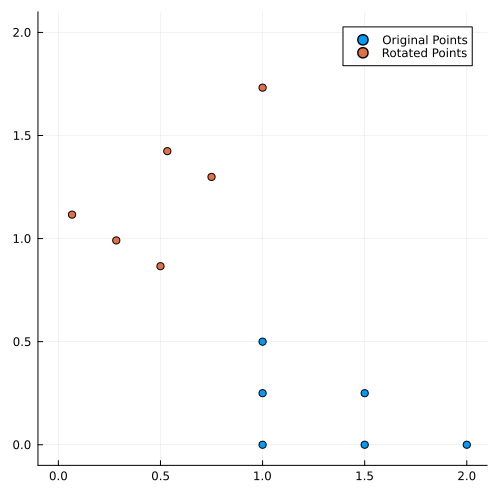

In [82]:
using Plots
scatter([c[1] for c in points], [c[2] for c in points], label="Original Points")
scatter!([c[1] for c in rpoints], [c[2] for c in rpoints], label="Rotated Points")
plot!(lims=(-0.1, 2.1), size=(500, 500), legend=true)

In conclution, this notebook offers a thorough explanation of the power approach for eigenvalue and eigenvector estimation, along with useful Julia implementations.
Additionally, it covers a number of fundamental ideas in linear algebra and shows how to use Julia's robust linear algebra library to perform computations quickly and effectively. The notebook seeks to improve knowledge of numerical linear algebra methods and Julia's abilities in this area through practical examples and explanations.